# HDBSCAN

Assumptions
* There are high-density regions separated by low-density regions

Parameter selection:

* min_cluster_size: The minimum size of clusters; single linkage splits that contain fewer points than this will be considered points “falling out” of a cluster

* gen_min_span_tree: set to True to construct a spanning tree whose sum of edge weights is as small as possible. To connect the points in the "fastest" way possible and avoid unnecessary loops.

* The rest are left by default

Returns (attributes):

In [1]:
%matplotlib inline
import math
import os
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
sns.set()
from collections import defaultdict
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
plt.rcParams["figure.figsize"] = (12,7)

C:\Users\lalaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
native = VariantCall(path)

In [4]:
list_18 = native.get_subunit_data('RDN18-1')
list_25 = native.get_subunit_data('RDN25-1')

# Determine min_cluster_size

As in DBSCAN, min_samples is best determined according to what makes sense knowing the dataset. Considering the number of points in the clusters found with other algorithms, appropriate cluster_size values should be: 

* 50 for 18S

* 100 for 25S

Plotting with the chosen parameters (light gray is noise):


With cluster_size = 50 for 18S no clusters are identified (all points are light gray). Only until decreasing cluster_size = 5 the following result is seen:

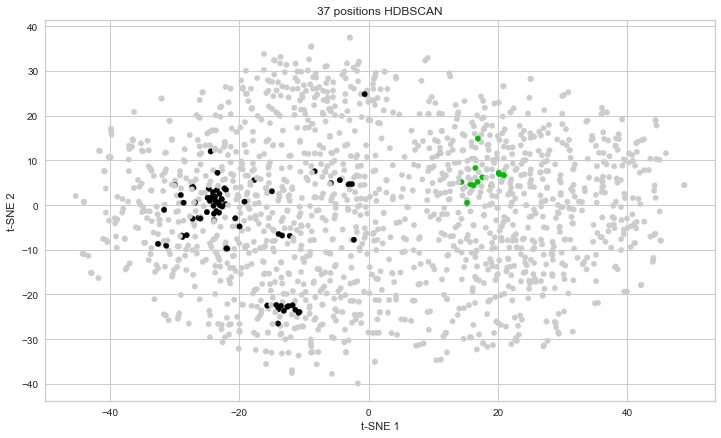

In [30]:
#18S
native.plot_tSNE_reads_covering_positions_data(list_18, 'HDBSCAN', cluster_size = 5) 

No clusters are identified in 25S regardless of how low the cluster_size value is set.

C:\Users\lalaj\anaconda3\lib\site-packages\hdbscan\hdbscan_.py:219: UserWarning: Cannot generate Minimum Spanning Tree; the implemented Prim's does not produce the full minimum spanning tree 
  'the full minimum spanning tree ', UserWarning)


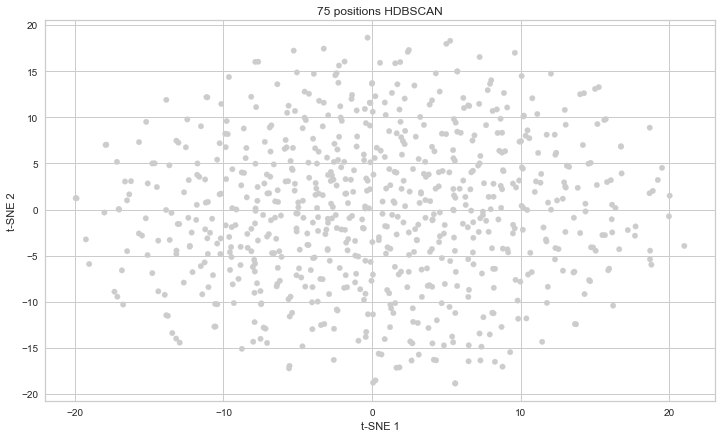

In [31]:
#25S
native.plot_tSNE_reads_covering_positions_data(list_25, 'HDBSCAN', cluster_size = 5) 